In [1]:
import numpy as np
from matplotlib import gridspec
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
def plot_annotation(ax, x):
    ax.scatter(x, np.zeros_like(x), label="annotation")

def plot_distribuion(ax, x, loc, scale):
    ax.plot(x, norm.pdf(x, loc, scale), label="distribution")
    ax.set_xlabel("y")
    ax.set_ylabel("p(y)")

def plot_prediction(ax, x, mu, sigma):
    ax.plot(x, norm.pdf(x, mu, sigma), label="prediction")

def pit_histogram(ax, x, mu, sigma):
    ax.hist(norm.cdf(x, loc=mu, scale=sigma))
    ax.set_xlabel("probability integral transform")
    ax.set_ylabel("count")

def reliability_diagram(ax, x, mu, sigma):
    def reliability(confidence):
        a, b = norm.interval(confidence, loc=mu, scale=sigma)
        return np.sum((a < x) & (x < b)) / len(x)
    confidences = np.linspace(0.0, 1.0, num=11)
    ax.plot(confidences, list(map(reliability, confidences)), marker="o")
    ax.plot(confidences, confidences)

def plot(mu, sigma, loc=0, scale=1, n=1000, start=-4, stop=4):
    y = np.random.default_rng().normal(loc=loc, scale=scale, size=n)
    domain = np.linspace(-4, 4)    
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    plot_annotation(ax0, y)
    plot_distribuion(ax0, domain, loc, scale)
    plot_prediction(ax0, domain, mu, sigma)
    ax0.legend()
    pit_histogram(ax1, y, mu, sigma)
    reliability_diagram(ax2, y, mu, sigma)

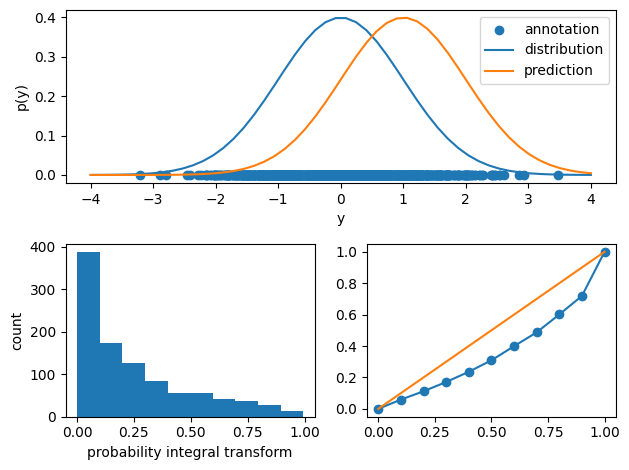

In [3]:
plot(1, 1)

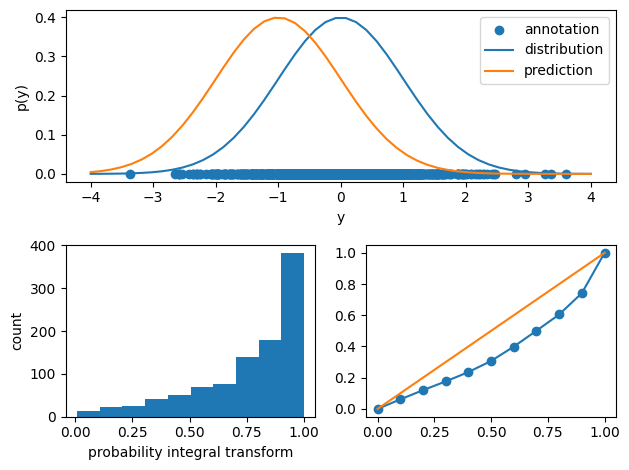

In [4]:
plot(-1, 1)

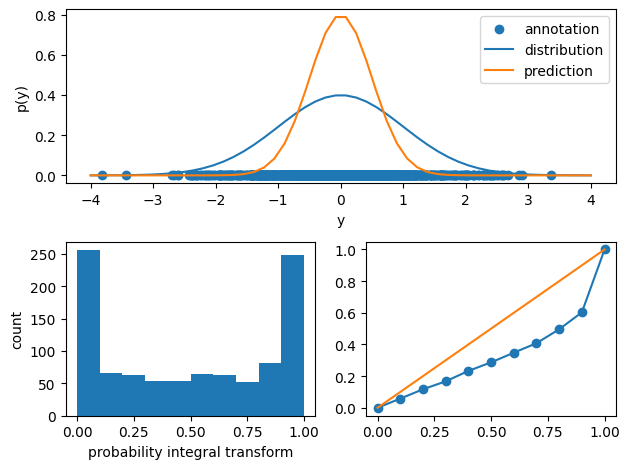

In [5]:
plot(0, 0.5)

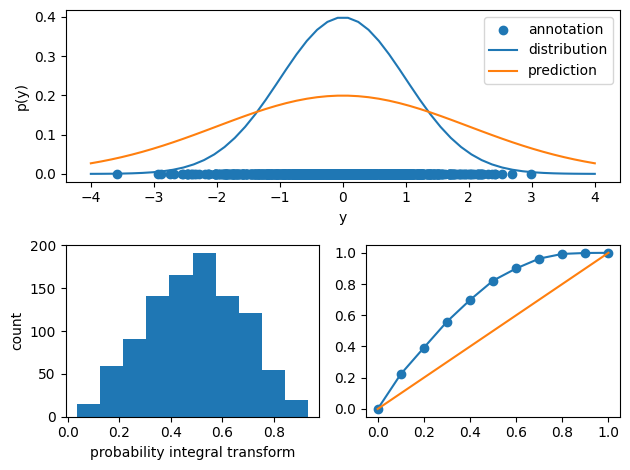

In [6]:
plot(0, 2)

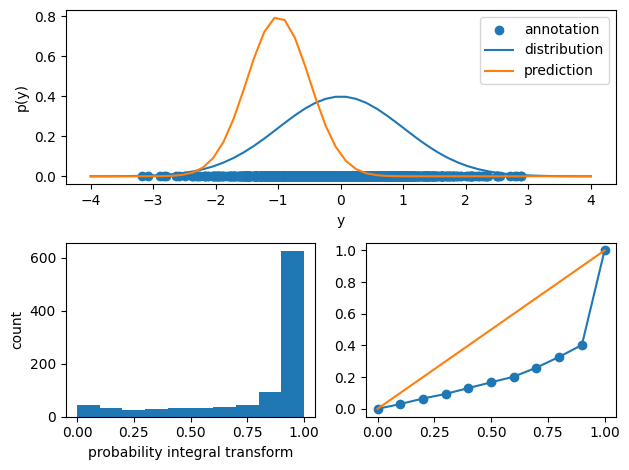

In [7]:
plot(-1, 0.5)

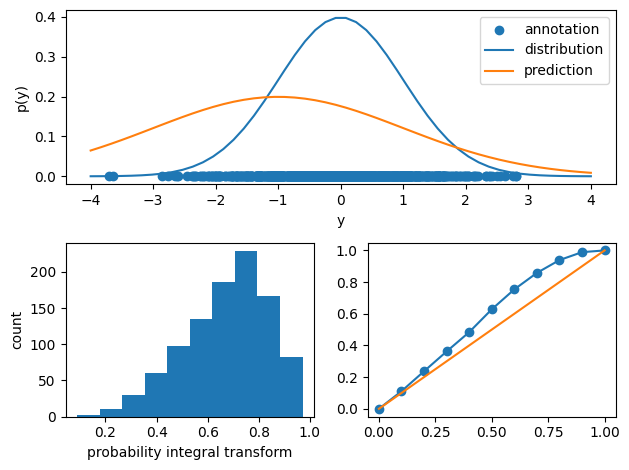

In [8]:
plot(-1, 2)

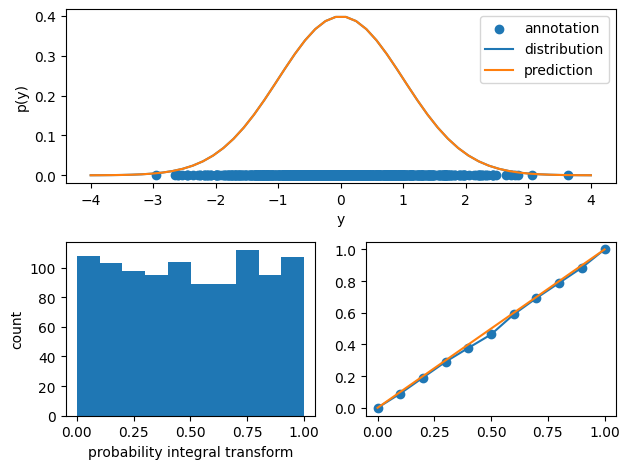

In [9]:
plot(0, 1)